## Student Stress Monitoring Datasets

This dataset captures survey responses from 843 college students aged 18–21 regarding their experiences with stress, health, relationships, academics, and emotional well-being. The responses were collected via Google Forms using a five-point Likert scale ("Not at all" to "Extremely") and anonymized to protect privacy.

It enables nuanced analysis of emotional and physical stress indicators and their correlations with academic performance and lifestyle factors.

credit:kaggle

In [8]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')




In [3]:
df = pd.read_csv('StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
# Display basic information
df.info()

In [ ]:
# dataset shape and data types
print("Dataset Shape:", df.shape)
print(df.dtypes)

In [ ]:
# empty values in each column
print(df.isnull().sum())

In [ ]:
# basic statistics
print("Basic Statistics:")
print(df.describe())


In [ ]:
print(df['stress_level'].value_counts())

In [ ]:
# Physical health indicators (likely columns)
physical_health_cols = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']

# Academic performance indicators
academic_cols = ['academic_performance', 'study_load', 'teacher_student_relationship', 
                'future_career_concerns', 'peer_pressure']

# Other relevant columns
mental_health_cols = ['anxiety_level', 'depression', 'self_esteem']
social_cols = ['social_support', 'extracurricular_activities', 'bullying']

print("\nPhysical health columns stats:")
print(df[physical_health_cols].describe())

print("\nAcademic performance columns stats:")
print(df[academic_cols].describe())

In [24]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Focus on correlations with stress_level
stress_correlations = corr_matrix['stress_level'].sort_values(ascending=False)
print("Correlations with stress_level:")
print(stress_correlations)



Correlations with stress_level:
stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


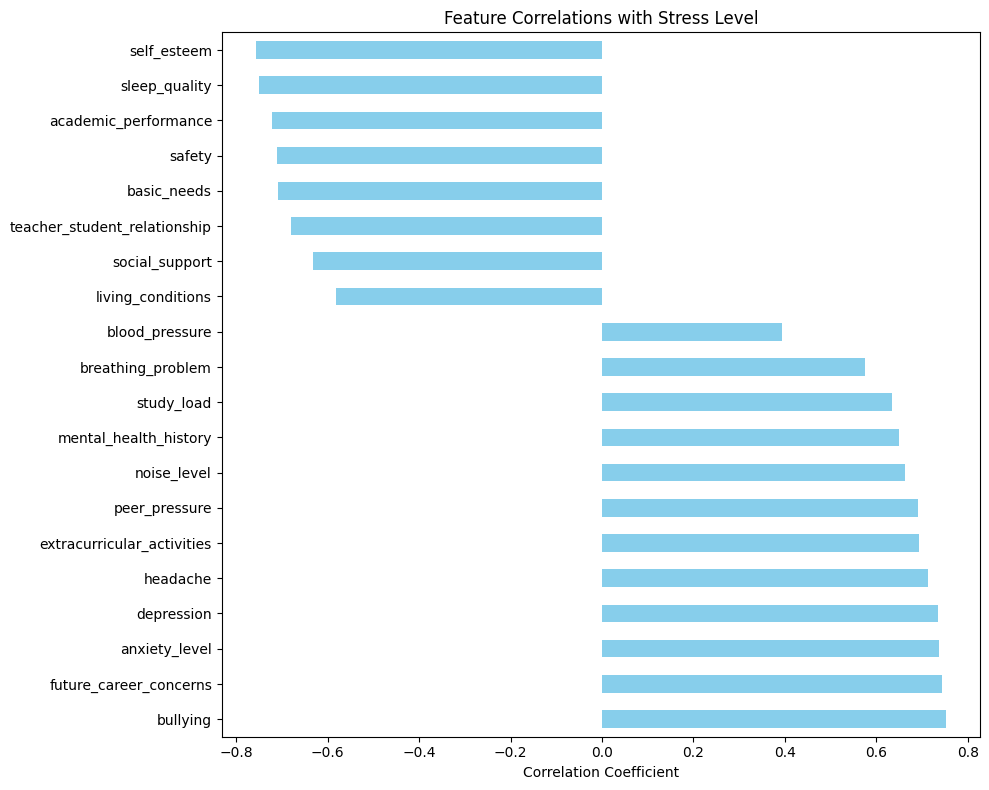

In [28]:
# Visualize correlations with stress level
plt.figure(figsize=(10, 8))
stress_correlations.drop('stress_level').plot(kind='barh', color='skyblue')
plt.title('Feature Correlations with Stress Level')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


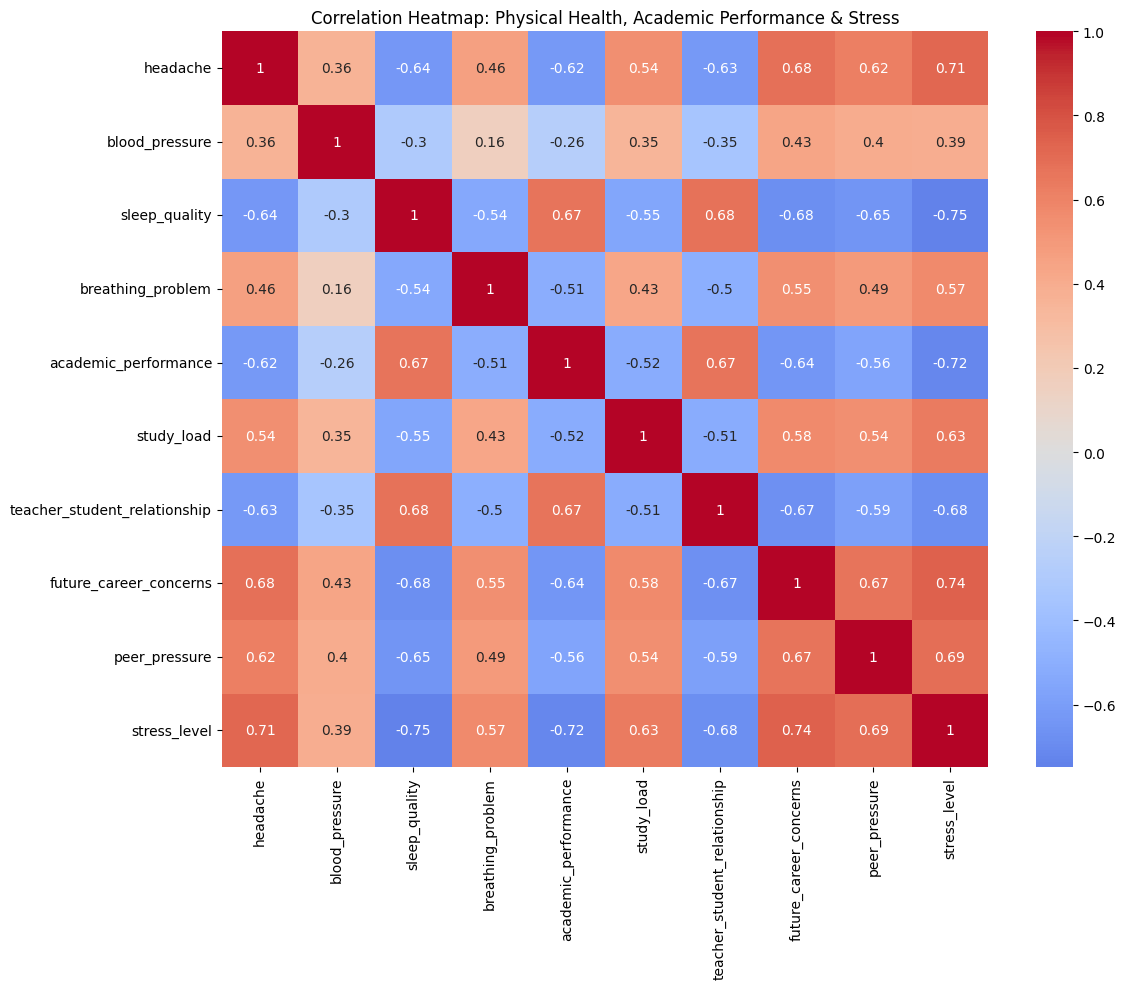

In [26]:
# Heatmap of selected features
selected_features = physical_health_cols + academic_cols + ['stress_level']
plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Physical Health, Academic Performance & Stress')
plt.tight_layout()
plt.show()

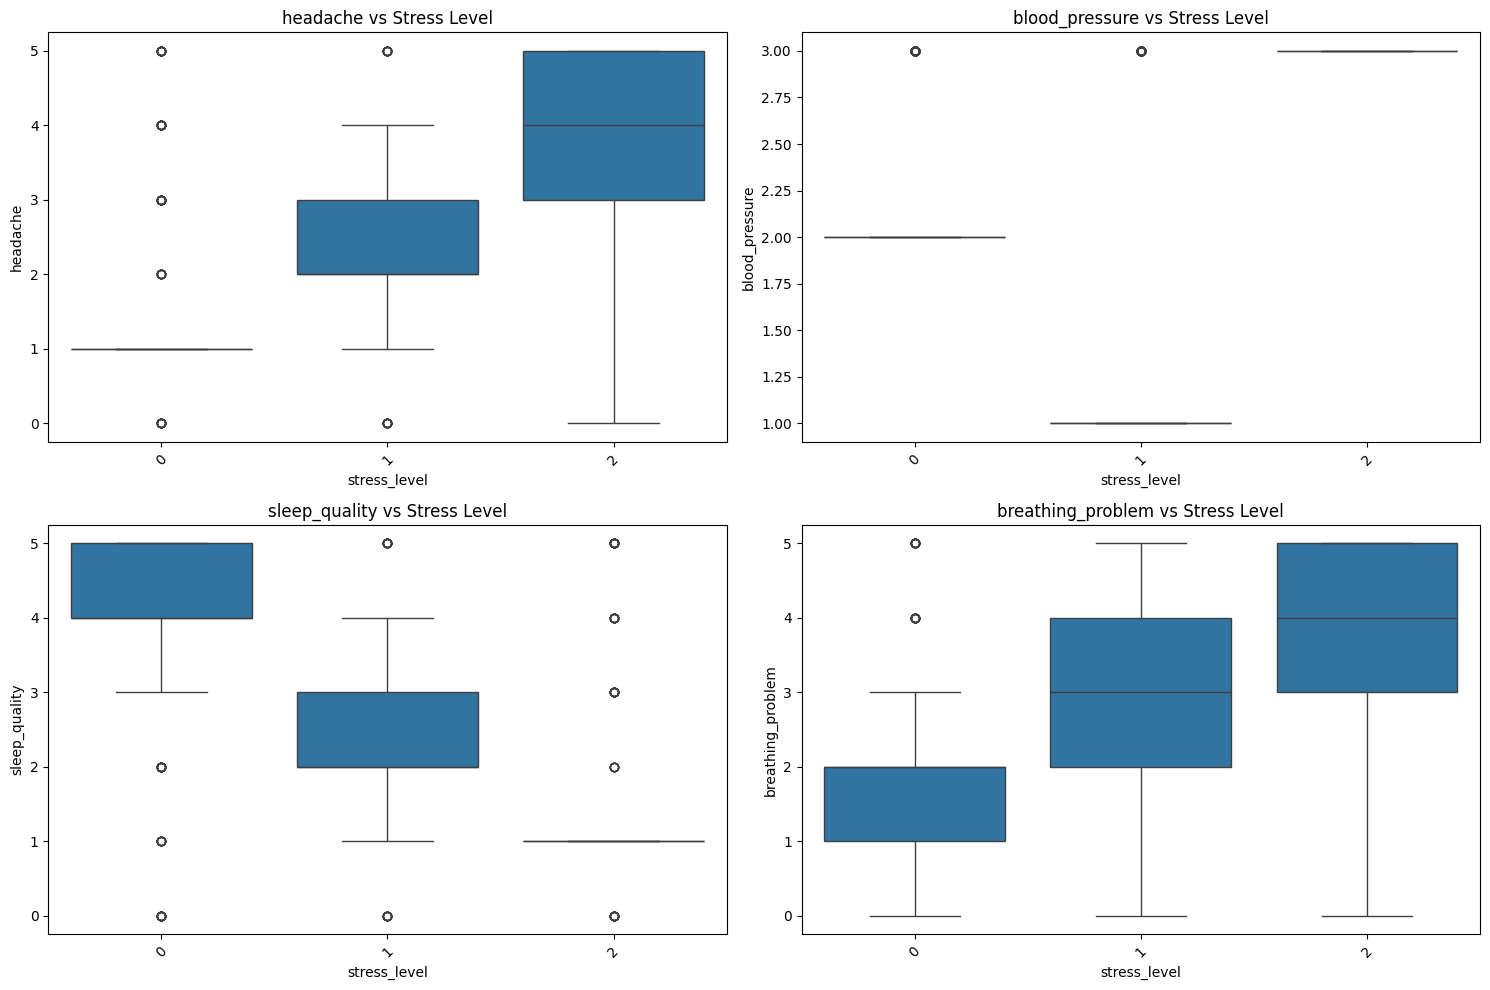

In [29]:
# Physical health vs stress level
plt.figure(figsize=(15, 10))

for i, col in enumerate(physical_health_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='stress_level', y=col, data=df)
    plt.title(f'{col} vs Stress Level')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

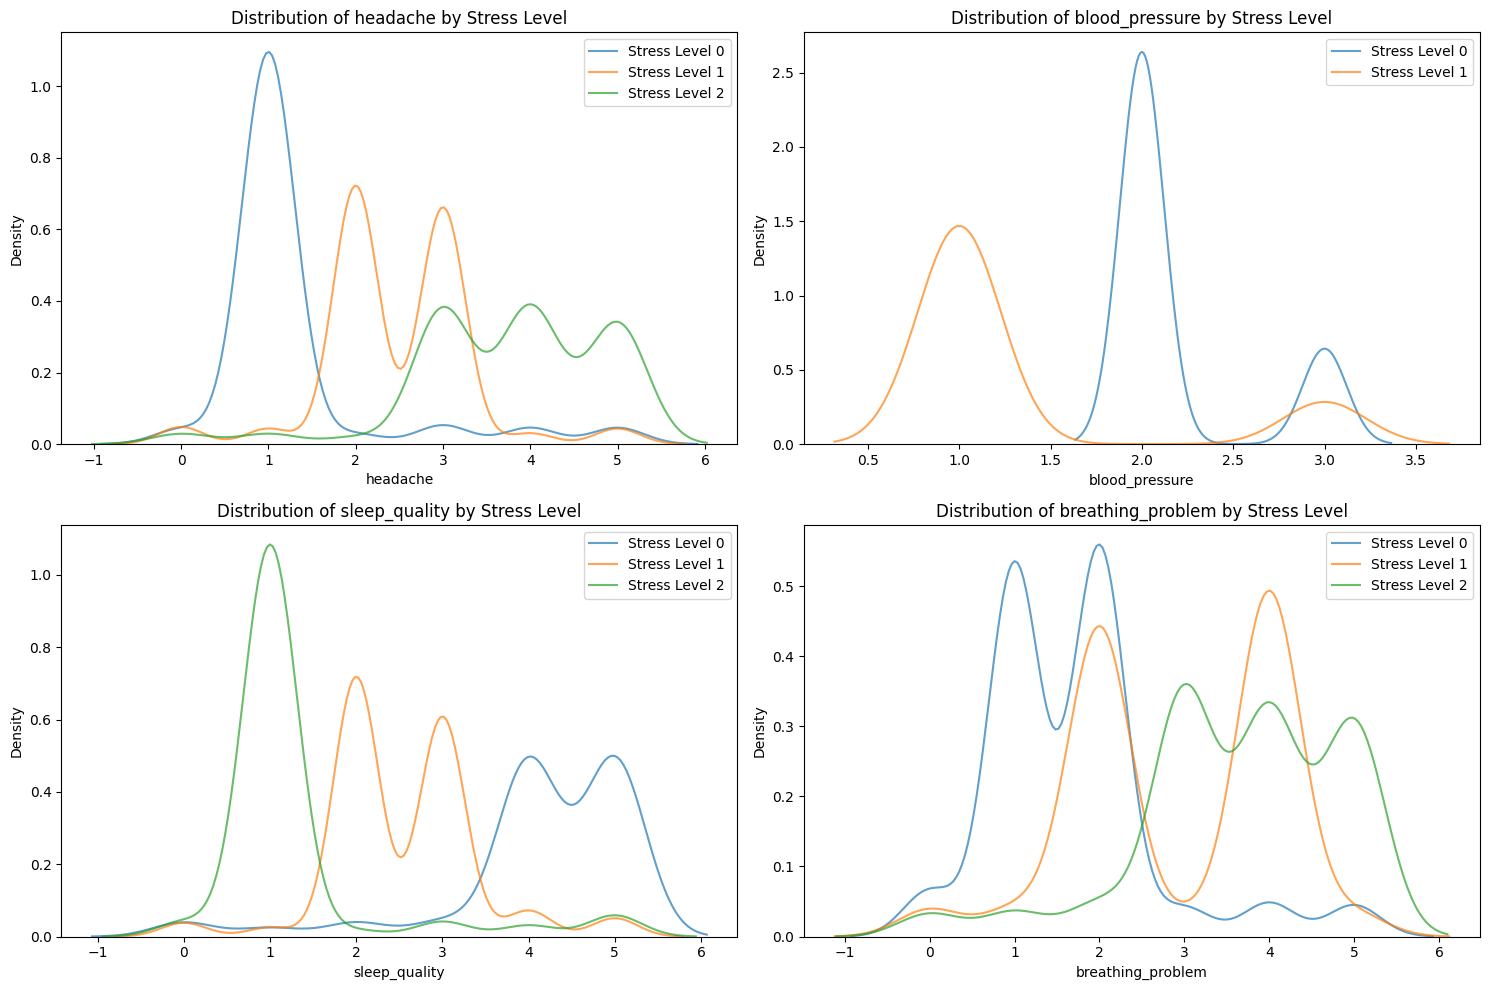

In [30]:
# Distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(physical_health_cols, 1):
    plt.subplot(2, 2, i)
    for stress_level in sorted(df['stress_level'].unique()):
        sns.kdeplot(df[df['stress_level'] == stress_level][col], 
                   label=f'Stress Level {stress_level}', alpha=0.7)
    plt.title(f'Distribution of {col} by Stress Level')
    plt.legend()

plt.tight_layout()
plt.show()

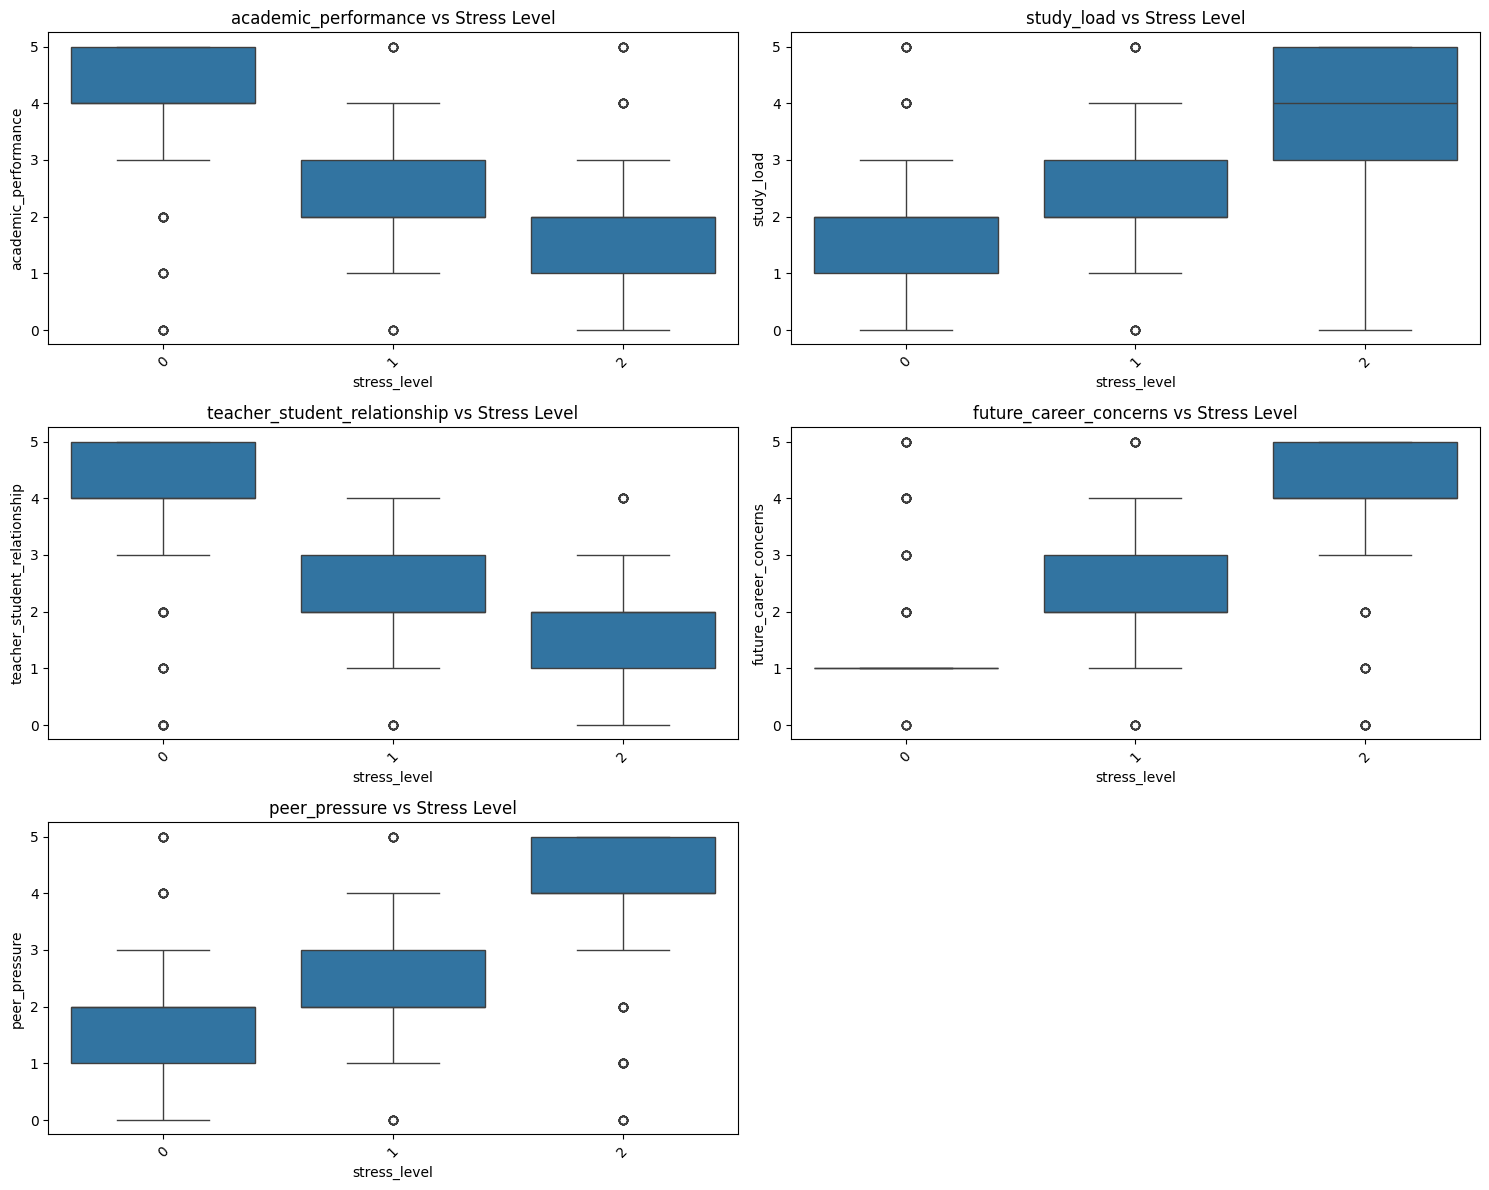

In [31]:
# Academic performance vs stress level
plt.figure(figsize=(15, 12))

for i, col in enumerate(academic_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='stress_level', y=col, data=df)
    plt.title(f'{col} vs Stress Level')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

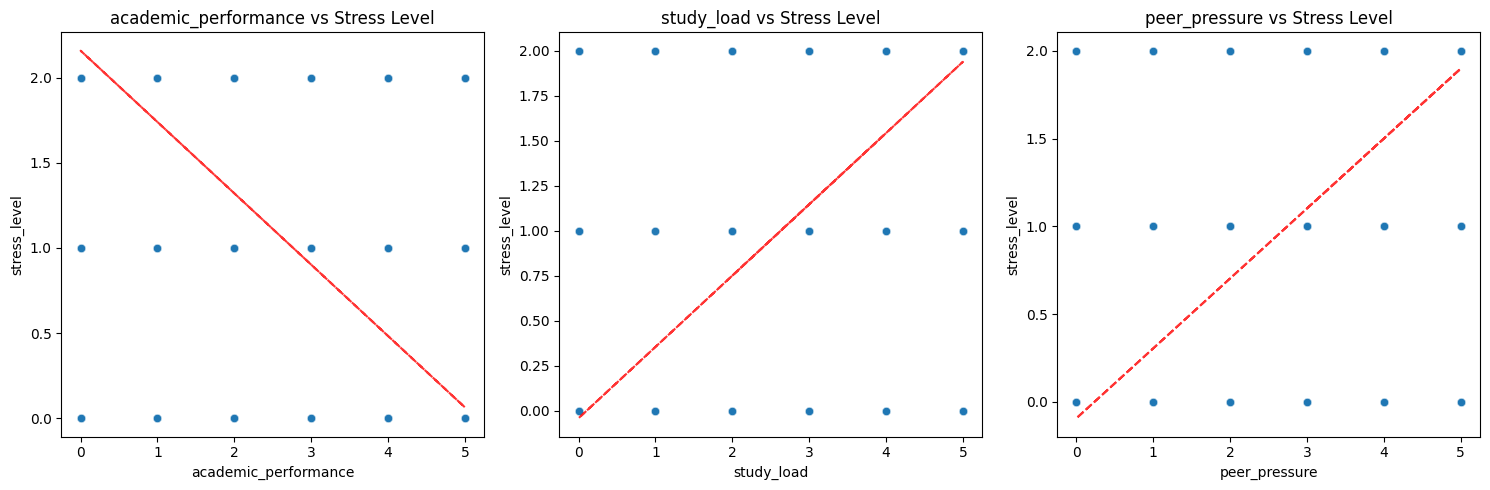

In [34]:
# Scatter plots for key academic factors
key_academic_factors = ['academic_performance', 'study_load', 'peer_pressure']
plt.figure(figsize=(15, 5))

for i, col in enumerate(key_academic_factors, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y='stress_level', data=df, alpha=0.6)
    plt.title(f'{col} vs Stress Level')
    # Add trend line
    z = np.polyfit(df[col], df['stress_level'], 1)
    p = np.poly1d(z)
    plt.plot(df[col], p(df[col]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

### PREPARATION OF DATASET FOR REGRESSION MODELING OF STRESS LEVEL

In [37]:
# Selecting features for modeling
features = physical_health_cols + academic_cols + mental_health_cols + social_cols
x = df[features]
y = df['stress_level']

In [ ]:
# checking for missing values
print("\nMissing values in features:")
print(x.isnull().sum())

In [43]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [45]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Training set: {x_train.shape}")
print(f"Testing set: {x_test.shape}")

Training set: (880, 15)
Testing set: (220, 15)


### Build and Compare the regression modeling of stress level

In [46]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }
    
    print(f"{name}:")
    print(f"  R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    print(f"  Cross-val R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print()

In [53]:
# Convert results to DataFrame for better visualization of stress level data set
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df[['R2', 'RMSE', 'MAE', 'CV R2 Mean']])

Model Comparison:
                         R2      RMSE       MAE  CV R2 Mean
Linear Regression  0.807452  0.358550  0.197049    0.744285
Ridge Regression   0.807463  0.358539  0.197040    0.744416
Lasso Regression   0.780143  0.383133  0.262733    0.721952
Random Forest      0.799815  0.365591  0.135682    0.792448
Gradient Boosting  0.761261  0.399247  0.158236    0.765009


In [56]:
# Get feature importance from the best model (Random Forest)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(x_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                         feature  importance
13    extracurricular_activities    0.163674
14                      bullying    0.155102
11                   self_esteem    0.143054
2                  sleep_quality    0.118404
6   teacher_student_relationship    0.115374
0                       headache    0.060628
4           academic_performance    0.052679
10                    depression    0.044923
7         future_career_concerns    0.039906
9                  anxiety_level    0.036482
8                  peer_pressure    0.022442
5                     study_load    0.020172
3              breathing_problem    0.018534
12                social_support    0.006996
1                 blood_pressure    0.001631


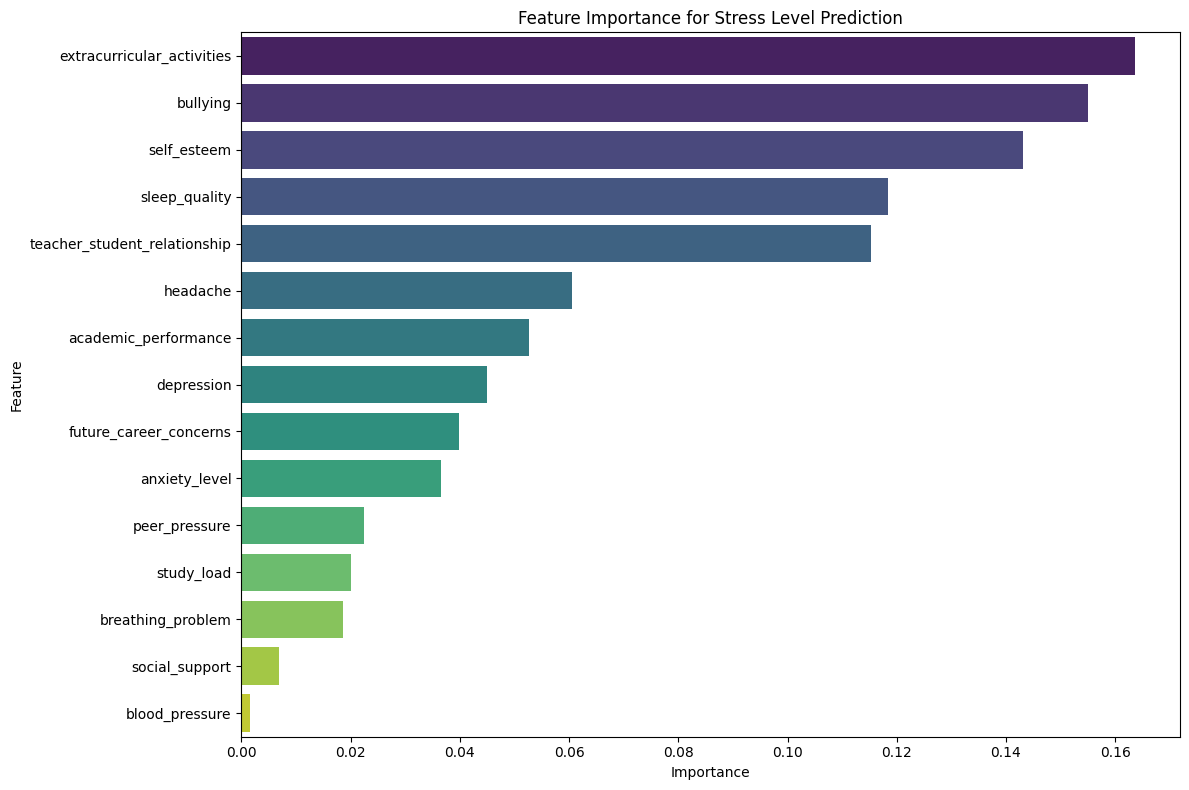

In [61]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Stress Level Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top 5 predictors: ['extracurricular_activities', 'bullying', 'self_esteem', 'sleep_quality', 'teacher_student_relationship']


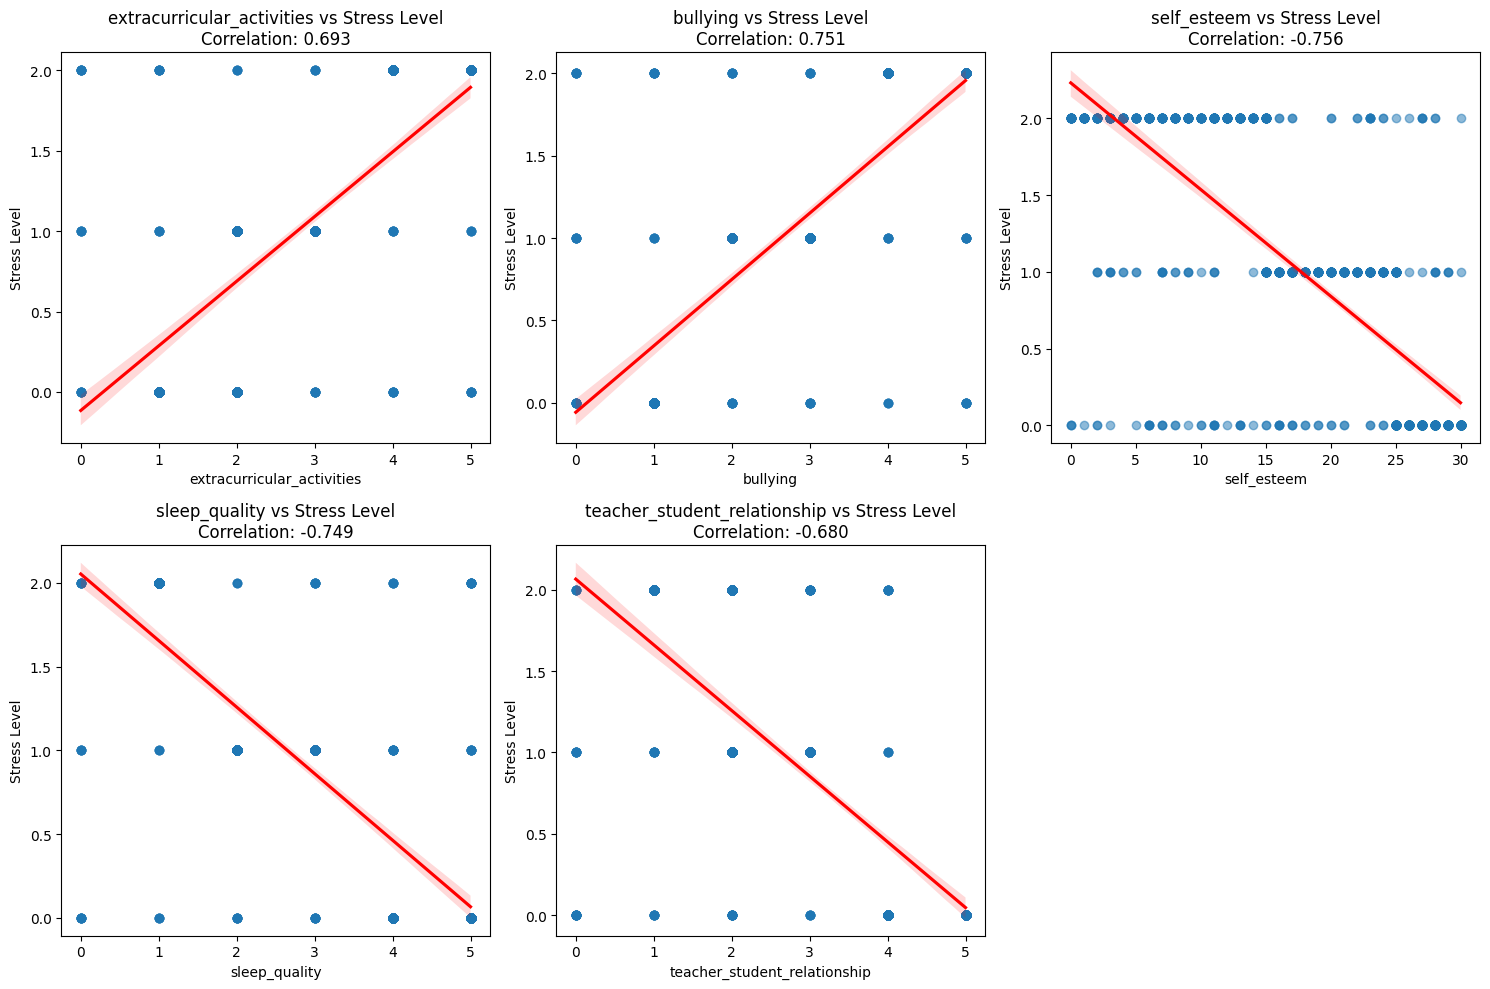

In [62]:
# Analyze top predictors
top_features = feature_importance.head(5)['feature'].tolist()
print(f"Top 5 predictors: {top_features}")

# Detailed analysis of top features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    # Scatter plot with regression line
    sns.regplot(x=df[feature], y=df['stress_level'], 
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{feature} vs Stress Level\nCorrelation: {df[feature].corr(df["stress_level"]):.3f}')
    plt.xlabel(feature)
    plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()

In [69]:
# Train final model on all data
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
x_scaled = scaler.fit_transform(x)
final_model.fit(x_scaled, y)

# Get final feature importance
final_importance = pd.DataFrame({
    'feature': features,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Final Feature Importance:")
print(final_importance)

# Key insights
print("\n" + "="*60)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*60)

print("\n1. TOP PREDICTORS OF STUDENT STRESS:")
for i, row in final_importance.head(3).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f} importance")

print("\n2. PHYSICAL HEALTH IMPACT:")
physical_impact = final_importance[final_importance['feature'].isin(physical_health_cols)]
for i, row in physical_impact.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f} importance")

print("\n3. ACADEMIC PERFORMANCE IMPACT:")
academic_impact = final_importance[final_importance['feature'].isin(academic_cols)]
for i, row in academic_impact.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f} importance")
    
    print("\n4. RECOMMENDATIONS FOR INSTITUTIONS:")
print("   - Focus on improving sleep quality and addressing breathing problems")
print("   - Implement academic support programs for study load management")
print("   - Provide career counseling to address future career concerns")
print("   - Create peer support systems to reduce peer pressure effects")
print("   - Offer mental health resources for anxiety and depression management")

Final Feature Importance:
                         feature  importance
2                  sleep_quality    0.187294
4           academic_performance    0.183474
11                   self_esteem    0.176709
0                       headache    0.083750
14                      bullying    0.075734
13    extracurricular_activities    0.062379
6   teacher_student_relationship    0.053401
9                  anxiety_level    0.043975
10                    depression    0.035906
7         future_career_concerns    0.025753
8                  peer_pressure    0.024790
5                     study_load    0.014323
3              breathing_problem    0.013514
12                social_support    0.012487
1                 blood_pressure    0.006511

KEY INSIGHTS AND RECOMMENDATIONS

1. TOP PREDICTORS OF STUDENT STRESS:
   - sleep_quality: 0.187 importance
   - academic_performance: 0.183 importance
   - self_esteem: 0.177 importance

2. PHYSICAL HEALTH IMPACT:
   - sleep_quality: 0.187 importance
 